In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import StandardScaler

appData=pd.read_csv("FineTech_appData.csv")
appData.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [2]:
appData.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [3]:
appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [4]:
appData['hour'] = appData.hour.str.slice(1,3).astype(int)

In [5]:
appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [6]:
appData.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
appData

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0


In [8]:
appVisual=appData[['user','dayofweek','hour','age','numscreens','minigame','used_premium_feature','enrolled','liked']]

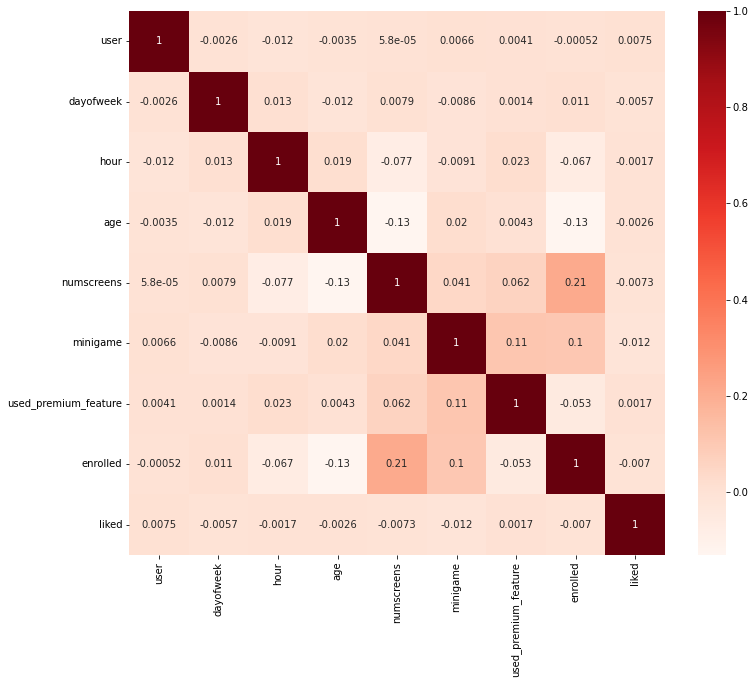

In [9]:
# heatmap to find the corelation between the attributes w.r.t target variable

plt.figure(figsize=(12,10))
cor = appVisual.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# we have found thet there is no strong corelation between any attributes.
# there is little corelation between numscreen and enrolled which mean those customer who enrolled for premimum app saw more screen
# and similarly between minigame and enrolled.
# there is slightly negative corelaton between age with enrolled and numscree which mean older customer do not enrolled for premium app and they don't see multiple screen


/Users/hoangnha218/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled', ylabel='count'>

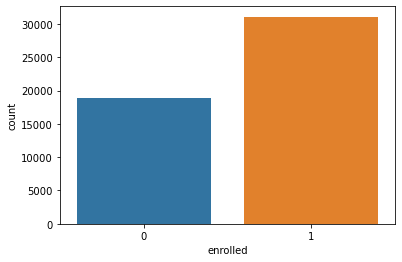

In [10]:
# Count for enrolled

sns.countplot(appData.enrolled)

In [11]:
print("OUT OF 50000")
print("No. of Not-Enrolled user :", (appData.enrolled<1).sum())
print("No. of Enrolled user :", (appData.enrolled==1).sum())

OUT OF 50000
No. of Not-Enrolled user : 18926
No. of Enrolled user : 31074


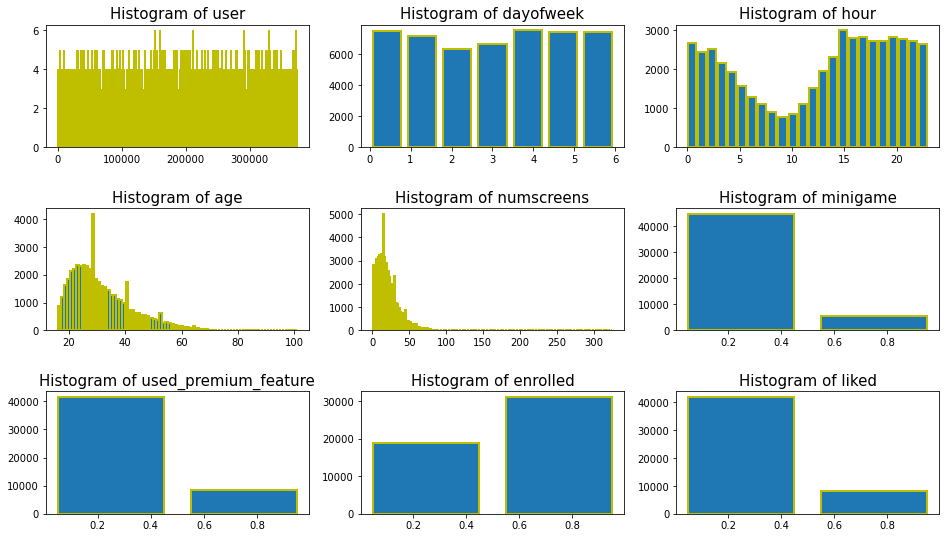

In [12]:
# plot histogram 
 
plt.figure(figsize = (16,9))
features = appVisual.columns 
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) 
    plt.title("Histogram of {}".format(j), fontsize = 15) 
     
    bins = len(appVisual[j].unique()) 
    plt.hist(appVisual[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) 
     
plt.subplots_adjust(hspace=0.5) 

/Users/hoangnha218/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


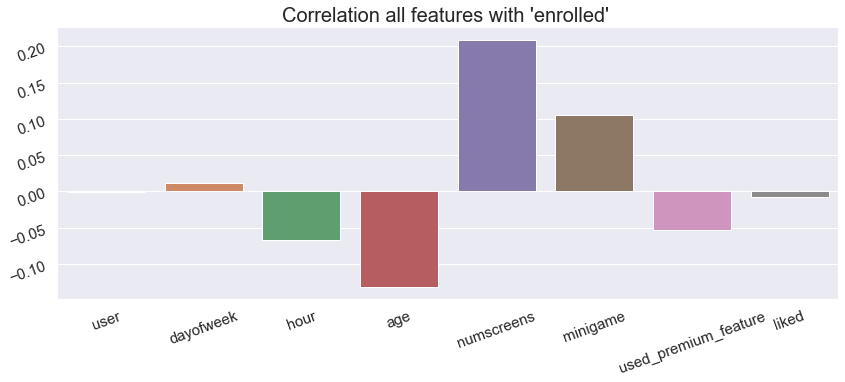

In [13]:
# show corelation barplot 
 
sns.set() 
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)
appVisual_1 = appVisual.drop(['enrolled'], axis = 1) 
ax =sns.barplot(appVisual_1.columns,appVisual_1.corrwith(appVisual.enrolled))  
ax.tick_params(labelsize=15, labelrotation = 20, color ="k") 


In [14]:
from dateutil import parser

appData['first_open'] = pd.to_datetime(appData['first_open'])
appData['enrolled_date'] = pd.to_datetime(appData['enrolled_date'])

appData.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [15]:
appData['totaltime']=(appData.enrolled_date - appData.first_open).astype('timedelta64[h]')

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <BarContainer object of 10 artists>)

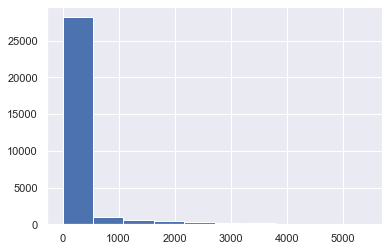

In [16]:
plt.hist(appData['totaltime'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

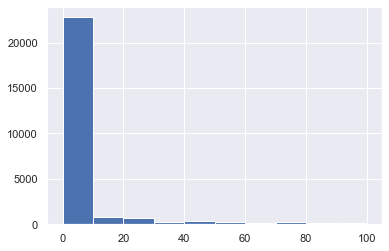

In [17]:
# distribution of time taken to enroll
plt.hist(appData['totaltime'].dropna(),range=(0,100))

# maximum customer enroll within 10 hours after the registration 


# Feature Selection

In [18]:
appData.loc[appData.totaltime > 48, 'enrolled']=0

appData.drop(columns = ['totaltime', 'enrolled_date'], inplace=True)



In [19]:
dataS= pd.read_csv('top_screens.csv').top_screens.values
dataS

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [20]:
appData['screen_list'] = appData.screen_list.astype(str) + ','

In [21]:
for name in dataS:
    appData[name] = appData.screen_list.str.contains(name).astype(int)
    appData['screen_list'] = appData.screen_list.str.replace(name +",", "")

In [22]:
appData.shape

(50000, 69)

In [23]:
appData

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,2012-12-27 02:14:51.273,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,2013-03-19 19:19:09.157,1,19,23,,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Home,ScanPreview,VerifySSN,product_review,prod...",13,0,0,1,...,0,0,0,1,0,0,0,0,0,0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Home,",4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Home,product_review,product_review,product_rev...",26,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
appData.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [25]:
appData['remain_screen_list'] = appData.screen_list.str.count(",")


In [26]:
appData.drop(columns = ['screen_list'], inplace=True)


In [27]:
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
appData['saving_screens_count'] = appData[saving_screens].sum(axis = 1)
appData.drop(columns = saving_screens, inplace = True)

In [28]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
appData['credit_screens_count'] = appData[credit_screens].sum(axis = 1)
appData.drop(columns = credit_screens, axis = 1, inplace = True)

In [29]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
appData['cc_screens_count'] = appData[cc_screens].sum(axis = 1)
appData.drop(columns = cc_screens, inplace = True)


In [30]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
appData['loan_screens_count'] = appData[loan_screens].sum(axis = 1)
appData.drop(columns = loan_screens, inplace = True)

In [31]:
appData.shape

(50000, 51)

<AxesSubplot:>

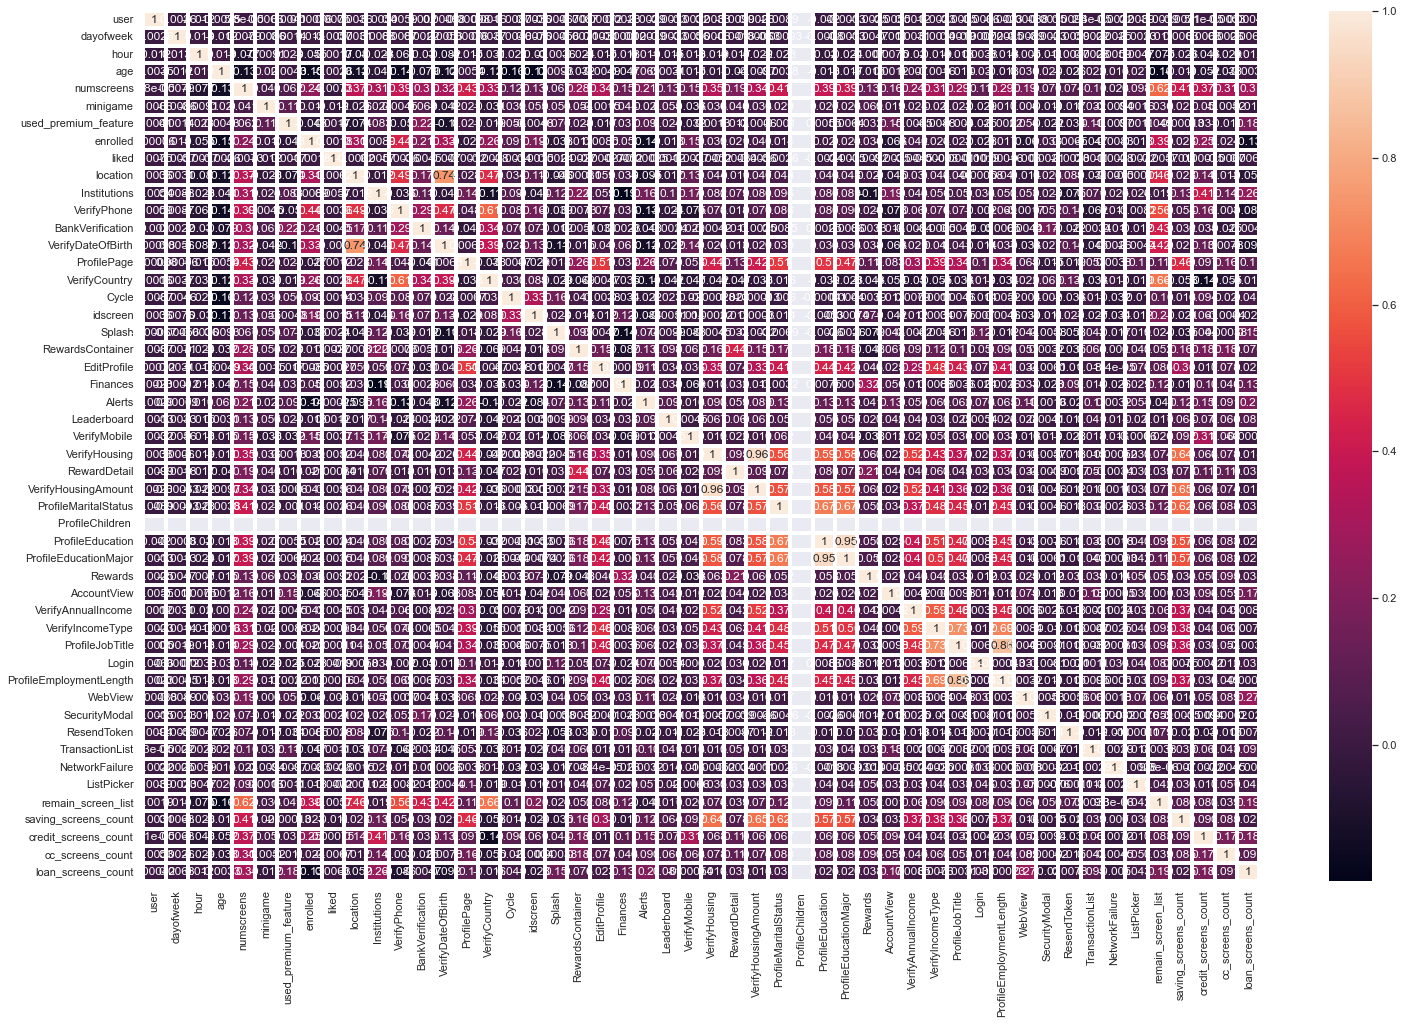

In [32]:
plt.figure(figsize = (25,16)) 
sns.heatmap(appData.corr(), annot = True, linewidth =4)

In [33]:
appData["first_open"] = pd.to_datetime(appData["first_open"])

In [34]:
appData['first_month'] = appData["first_open"].dt.month

# Data Preprocessing

In [35]:
df_dummies = pd.get_dummies(appData, prefix='dayofweek', prefix_sep='.',columns=['dayofweek'])
df_dummies = pd.get_dummies(df_dummies, prefix='first_month', prefix_sep='.',columns=['first_month'])
#df_dummies = pd.get_dummies(df_dummies, prefix='hour', prefix_sep='.',columns=['hour'])
df_dummies=df_dummies.drop(["first_open"],1)
df_dummies.head()

/var/folders/y3/zg8_bjc127s_qr_j864sbblr0000gn/T/ipykernel_3850/3921858101.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_dummies=df_dummies.drop(["first_open"],1)


,user,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,...,dayofweek.6,first_month.1,first_month.2,first_month.3,first_month.4,first_month.5,first_month.6,first_month.7,first_month.11,first_month.12
0,235136,2,23,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,333588,1,24,13,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
2,254414,19,23,3,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,234192,16,28,40,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,51549,18,31,32,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [36]:
appDataDP = df_dummies
target = df_dummies['enrolled']
df_dummies.drop(columns = 'enrolled', inplace = True)

In [37]:
from sklearn.model_selection import train_test_split
appDataDP=appDataDP.loc[:, (appDataDP != 0).any(axis=0)]
seed = 7
X_train, X_test, y_train, y_test = train_test_split(appDataDP, target, test_size = 0.3, random_state=seed)

In [38]:
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

/Users/hoangnha218/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

logit_model = LogisticRegression(random_state = seed, penalty = 'l2')
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model.score(X_test, y_test)))

0.7754
Accuracy of logistic regression classifier on test set: 0.78


/Users/hoangnha218/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# train with Standard Scaling dataset
logit_model = LogisticRegression(random_state = seed, penalty = 'l2')
logit_model.fit(X_train_sc, y_train)
y_pred = logit_model.predict(X_test_sc)
print(accuracy_score(y_test, y_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model.score(X_test, y_test)))

0.7807333333333333
Accuracy of logistic regression classifier on test set: 0.70


In [44]:
import statsmodels.api as sm
sm_model = sm.Logit(target, sm.add_constant(appDataDP)).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()

/Users/hoangnha218/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                      NaN
user              7.331380e-01
hour              1.686372e-01
age               2.889624e-23
numscreens        2.499459e-06
                      ...     
first_month.5              NaN
first_month.6              NaN
first_month.7              NaN
first_month.11             NaN
first_month.12             NaN
Length: 64, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               enrolled   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49938
Method:                           MLE   Df Model:                           61
Date:                Mon, 18 Apr 2022   Pseudo R-squ.:                  0.3165
Time:                        01:09:26   Log-Likelihood:                -23686.
converged:                       True   LL-Null:                       -34656.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.3036        nan        nan        nan         nan         nan
user                    -3.598e-08   1.06e-07     -0.341      0.733   -2.43e-07    1.71e-07
hour                       -0.0021      0.002     -1.377      0.169      -0.005       0.001
age                        -0.0109      0.001     -9.936      0.000      -0.013      -0.009
numscreens                 -0.0076      0.002     -4.708      0.000      -0.011      -0.004
minigame                   -0.1674      0.038     -4.438      0.000      -0.241      -0.093
used_premium_feature       -0.2345      0.035     -6.776      0.000      -0.302      -0.167
liked                       0.0113      0.031      0.368      0.713      -0.049       0.071
location                   -0.1620      0.035     -4.683      0.000      -0.230      -0.094
Institutions               -0.1127      0.033     -3.432      0.001      -0.177      -0.048
VerifyPhone                 1.2368      0.032     38.386      0.000       1.174       1.300
BankVerification            0.1975      0.030      6.573      0.000       0.139       0.256
VerifyDateOfBirth           0.3451      0.033     10.393      0.000       0.280       0.410
ProfilePage                -0.2314      0.045     -5.169      0.000      -0.319      -0.144
VerifyCountry              -0.6024      0.038    -15.863      0.000      -0.677      -0.528
Cycle                      -0.0106      0.026     -0.400      0.689      -0.062       0.041
idscreen                    0.2757      0.027     10.285      0.000       0.223       0.328
Splash                     -0.1794      0.040     -4.469      0.000      -0.258      -0.101
RewardsContainer           -0.1339      0.051     -2.612      0.009      -0.234      -0.033
EditProfile                 0.3415      0.067      5.066      0.000       0.209       0.474
Finances                    0.0358      0.054      0.658      0.510      -0.071       0.143
Alerts                     -0.7783      0.054    -14.388      0.000      -0.884      -0.672
Leaderboard                -0.0919      0.053     -1.729      0.084      -0.196       0.012
VerifyMobile                2.2489      0.068     32.997      0.000       2.115       2.383
VerifyHousing               0.0109      0.189      0.058      0.954      -0.359       0.381
RewardDetail               -0.0333      0.078     -0.426      0.670      -0.187       0.120
VerifyHousingAmount        -0.0598      0.194     -0.308      0.758      -0.440       0.320
ProfileMaritalStatus       -0.1707      0.083     -2.055      0.040      -0.334      -0.008
ProfileEducation            0.0593      0.174      0.340      0.734      -0.282       0.401
ProfileEducationMajor      -0.1509      0.180     -0.839      0.402      -0.504       0.202
Rewards                     0.2658      0.084      3.171      0.002       0.101       0.430
AccountView                -0.2524      0.086     -2.940      0.003      -0.421      -0.084
VerifyAnnualIncome   

In [45]:
logit_model=sm.Logit(target,appDataDP)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.473726
         Iterations 6
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.317     
Dependent Variable:    enrolled           AIC:                47496.5875
Date:                  2022-04-18 01:09   BIC:                48043.4138
No. Observations:      50000              Log-Likelihood:     -23686.   
Df Model:              61                 LL-Null:            -34656.   
Df Residuals:          49938              LLR p-value:        0.0000    
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
user                    -0.0000   0.0000  -0.3410 0

## SVM

In [54]:
# train with Standard Scaling dataset
from sklearn.svm import SVC
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)
accuracy_score(y_test, y_pred_svc_sc)

0.7928666666666667

Text(0.5, 1.0, 'Confussion Matrix')

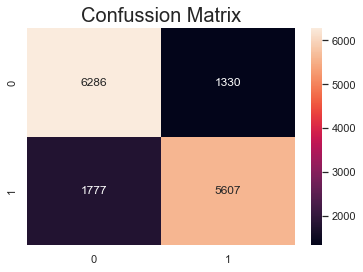

In [49]:
cm_SVM = confusion_matrix(y_test, y_pred_svc_sc)
sns.heatmap(cm_SVM, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)

## Random Forest

In [50]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
 
accuracy_score(y_test, y_pred_rf)

0.7838

In [51]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)

0.7849333333333334

Text(0.5, 1.0, 'Confussion Matrix')

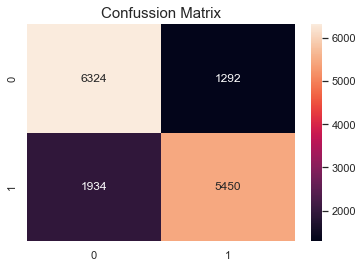

In [52]:
cm_RF = confusion_matrix(y_test, y_pred_rf_sc )
sns.heatmap(cm_RF, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 15)

# Additional experiment: Multiple Model

In [53]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold= model_selection.KFold(n_splits=10)
    cv_results= model_selection.cross_val_score(model, X_train_sc, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.781971 (0.008166)
LDA: 0.780771 (0.007192)
KNN: 0.741171 (0.003948)
CART: 0.720543 (0.005909)
NB: 0.734657 (0.008638)
SVM: 0.794000 (0.004002)
